# Final project

<b>Teams: </b> 3-4 people 

<b>Report Due Date: </b> 11:59pm Monday, April 25th (the night before the first set of presentations)

## Deliverables: 

1. Folder containing all the code files (no need to include data) used for project. Include a README.txt that briefly describes the functions/purposes of each file and the order you run them in. 
2. Prepare a report that addresses all the major questions (3 for undergraduate section and 4 for graduate section). The report should be focused on detailing the methods and the exploration of the dataset. Please include labeled figures to better visualize the results and data. 
3. Prepare a 10-15 minute presentation that summarizes the method used and the results. Include your slides in your submission.

## Introduction: 

Your collaborators are working on protocols to produce engineered mouse cardiomyocytes (CM) in vitro from fibroblasts. They have generated single-cell RNA-seq data and they are hoping you can help provide detailed hypotheses about the status of their cells and about potential protocol improvements. Their single-cell data are provided in the file folder [direct_conversion_data](https://compstemcellbio.s3.amazonaws.com/2022/final_project/direct_conversion_data_subsampled.zip). These data are in fact from [Stone et al](https://pubmed.ncbi.nlm.nih.gov/31271750/). Batched 1, 2, 3, 4, 5, and 6 represent timepoints -1, 1, 2, 3, 7, and 14. We have subsampled the data to 5,000 cells total, which we hope will simplify analysis for people with less RAM. If you want and you have sufficient computational power, you can also use the entire Stone dataset in [direct_conversion_data_full](https://compstemcellbio.s3.amazonaws.com/2022/final_project/direct_conversion_data_big.zip).

## Major Questions: 

<b>1. How pure are your engineered cardiomyocytes?</b> 

For estimating the success of engineered cardiomyocyte from Stone et al (similarity of expression profiles to cardiac muscle cells or fibroblast), perform in silico validation of the expression profiles with [reference dataset sampled from Tabula Muris](https://compstemcellbio.s3.amazonaws.com/2022/final_project/TM_FACS_heart.h5ad). Develop a method to perform comparison between the engineered CMs and reference dataset. 
- You may choose to use [pySCN](https://github.com/pcahan1/PySingleCellNet) to perform the assessment. 


<b> 2. How mature are your engineered cardiomyocytes? </b>

Heart is one of the earliest organs to develop during embryogenesis. In mice, as early as embryonic day E7.0-7.5, convergence of lateral mesoderm domain called first heart field begins to beat. Cardiomyocytes rapidly proliferate up until E14, and then start maturation after. 

<figure>
    <img src="img/in_vivo_cardiomyocyte.png" width=500>
    <figcaption>Conceptual scheme of maturation phase of heart development. <a href="https://www.ahajournals.org/doi/10.1161/CIRCRESAHA.119.315862">Guo et al, 2020</a>
                                                                                                                         
</figcaption>
</figure>

Some of the major hallmarks of cardiomyocyte maturation include cell cycle arrest, multinucleation, growth by hypertrophy, transition to oxidative metabolism, and expression of mature sarcomeric contractile protein isoforms. [Padula et al, 2021](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8004589/) provides a review of the transcriptional regulations of cardiomyocyte maturation and the TF genes associated with CM maturation phenotypes.

To computationally estimate the maturity of engineered CM’s across different data sources, [Kannan et al](https://journals.plos.org/ploscompbiol/article/authors?id=10.1371/journal.pcbi.1009305) constructed a reference scRNA-seq resource for CM maturation by isolating CM cells from Myh6-Cre; mTmG (aMHC x mTmG) mice across 12 time points of CM maturation. 


<figure>
    <img src="img/postnatal_CM_maturation.png" width=600>
    <figcaption>A. Mouse model used to generate perinatal maturation reference scRNA-seq dataset. B. UMAP of maturation reference dataset. <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1009305">Kannan et al, 2021</a>
                                                                                                                         
</figcaption>
</figure>

Kannan et al have provided a detailed protocol accompanied by software and extensive meta-analysis and validation for their entropy based method. Apply the protocol of Kannan et al. or use some other method to determine the maturation time point that the engineered CMs are most similar to using the [perinatal_reference_data](https://compstemcellbio.s3.amazonaws.com/2022/final_project/perinatal_reference_data.zip). As Kannan et al. do, you should only select the cells that were classified as cardiomyocyte in the previous steps. 

<b>3. What genetic alterations could improve your engineered cardiomyocytes?</b>

Estimating maturity is useful as a metric, but it does not provide an immediate path forward in the form of specific hypotheses for how to improve the engineered CMs. Your collaborators want to identify candidate TFs that they could overexpress or knock out to further enhance differentiation. Set up an in silico screen with CellOracle. The essential components are:
1. A training dataset. To ensure relevant cell types are represented, we recommend the in vivo perinatal CM development timecourse from Kannan et al., available in file folder [perinatal_reference_data](https://compstemcellbio.s3.amazonaws.com/2022/final_project/perinatal_reference_data.zip). 

2. An evaluation dataset. How well do CellOracle’s predicted fold changes correspond to what would actually happen? You can test this using a cardiomyocyte-specific knockout of the transcription factor Prdm16, which was assayed with scRNA-seq at embryonic day 13.5 in figure 6 of [Wu et al. 2022.](https://pubmed.ncbi.nlm.nih.gov/34915728/). These data have been downsampled to 5,000 barcodes and are available in the [wu_prdm16 folder](https://compstemcellbio.s3.amazonaws.com/2022/final_project/wu_prdm16.zip). There are two biological replicates each of control and knockout samples.

3. A base GRN. To obtain better performance across a wider range of testable perturbations, compare three options for the base network: completely dense (all possible connections), CellOracle’s default, and a custom base network derived from motif analysis of the ATAC-seq data in Figure 3 of Stone et al, available in <b>direct_conversion_data/GSE130806_Bulk_Atac_Count_Data.bed</b>. As controls, also include randomly generated networks matching the density of the motif-derived networks. There is a tutorial on motif analysis for CellOracle [here](https://morris-lab.github.io/CellOracle.documentation/notebooks/01_ATAC-seq_data_processing/option2_Bulk_ATAC-seq_data/01_preprocess_Bulk_ATAC_seq_peak_data.html). If your team has 4 or fewer members, you can skip this item. Just use the default base GRN provided with CellOracle. 

4. A summary metric. Though it’s very useful to have per-gene fold change predictions, they are hard to understand and hard to rank by usefulness. Develop a method to rank the predicted transcriptomes by how useful the perturbations will be for engineering cardiomyocytes.
    - Look at what TF perturbation would drive the maturation of cardiomyocytes and whether or not it would specifically be beneficial to drive the maturation of cells from directed conversion experiment.

In [ ]:
#pip install matplotlib

In [ ]:
#!pip3 install leidenalg



In [ ]:
#!conda install pandas

In [ ]:
#pip install git+https://github.com/morris-lab/CellOracle.git


In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import celloracle as co
import warnings
warnings.filterwarnings(action='once')

co.check_python_requirements()
co.test_R_libraries_installation()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300
save_folder = "figures"
os.makedirs(save_folder, exist_ok=True)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/wvcui/opt/anaconda3/envs/celloracle_env/lib/python3.8/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [2]:
#!pip install anndata --upgrade --quiet

In [3]:
training = sc.read_h5ad("/Users/wvcui/Desktop/OneDrive - Johns Hopkins/Sp22/Comp SC/final proj/perinatal_reference_data/Kannan_perinatal_reference.h5ad")

In [4]:
training.X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 18., ...,  0.,  0.,  0.]], dtype=float32)

In [5]:
prdmko = sc.read_h5ad('/Users/wvcui/Desktop/OneDrive - Johns Hopkins/Sp22/Comp SC/final proj/wu_prdm16/wu_prdm16.h5ad')

In [6]:
prdmko

AnnData object with n_obs × n_vars = 5000 × 32285
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()
base_GRN.head()

,peak_id,gene_short_name,9430076c15rik,Ac002126.6,Ac012531.1,Ac226150.2,Afp,Ahr,Ahrr,Aire,...,Znf784,Znf8,Znf816,Znf85,Zscan10,Zscan16,Zscan22,Zscan26,Zscan31,Zscan4
0,chr10_100050979_100052296,4930430F08Rik,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_101006922_101007748,SNORA17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,chr10_101144061_101145000,Mgat4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,chr10_10148873_10149183,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_10149425_10149815,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
adata = sc.read_h5ad("/Users/wvcui/Desktop/OneDrive - Johns Hopkins/Sp22/Comp SC/final proj/direct_conversion_subsampled_5k_raw.h5ad")
adata

AnnData object with n_obs × n_vars = 5000 × 33595
    obs: 'batch'

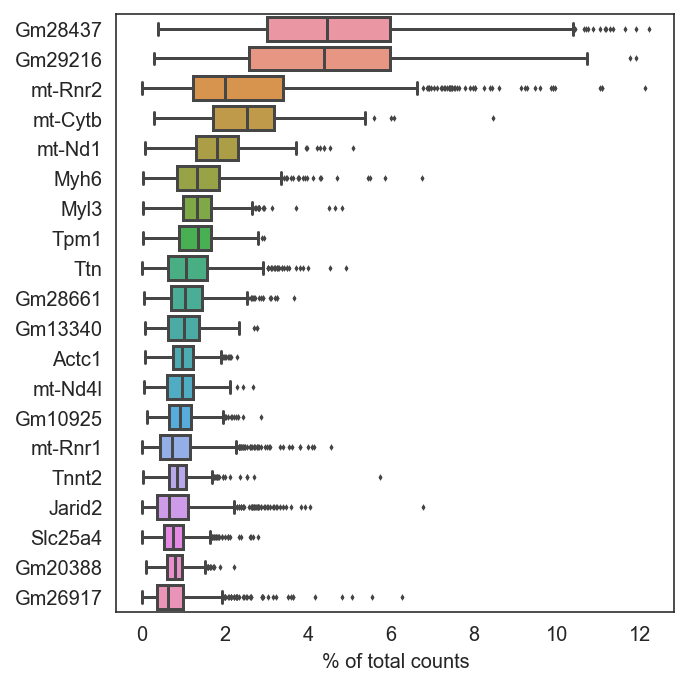

In [9]:
sc.pl.highest_expr_genes(training, n_top=20, )


In [32]:
## A function designed to do the preprocessing and cleaning of the data. adapted from part 6 in HW2. 
# This function takes in four arguments. 
# It takes in an Anndata object and three boolean arguments dictating whether to remove cells with high ribosomal expressions, high mitochondrial expressions, or genes with low expressions. 

def autoAnalysis(adata, exclude_high_ribo = True, exclude_high_mito = True, exclude_undetected_gene = True):
    print("Number of genes: ",adata.n_vars)
    print("Number of cells: ",adata.n_obs)
    ## Identify mitochondrial, ribosomal genes
    adata.var['mt']= adata.var_names.str.startswith(("mt-"))
    print("number of mitochondrial genes: ", sum(adata.var['mt']))
    adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
    print("number of ribosomal genes: ", sum(adata.var['ribo']))
    sc.pp.calculate_qc_metrics(adata, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)
    ## Filtering out low-quality mt and ribo genes
    if exclude_high_mito == True: 
        # filter for percent mt > 10% 
        adata = adata[adata.obs['pct_counts_mt'] < 10, :]
        print("Number of cells after mt removal: ",adata.n_obs)
    if exclude_high_ribo == True: 
        # filter for percent ribo > 50%
        adata = adata[adata.obs['pct_counts_ribo'] < 50, :]
        print("Number of cells after ribo removal: ",adata.n_obs)
    axs = sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)
    sc.pl.highest_expr_genes(adata, n_top=10, palette="Blues", width=.3)
    ## Filtering out undetected genes (below gThresh)
    if exclude_undetected_gene == True: 
        ## excluding undetected genes (gene expression below gThresh)
        gThresh = 250
        sc.pp.filter_genes(adata, min_cells=gThresh)
        print("Number of genes after removing undetected ones: ",adata.n_vars)
    ## filtering out genes that are highly expressed but not informative 
    mito_genes = adata.var['mt']
    ribo_genes = adata.var['ribo']
    malat_genes = adata.var_names.str.startswith("Malat1")
    genes_to_remove = np.add(mito_genes, ribo_genes)
    genes_to_remove = np.add(genes_to_remove, malat_genes)
    genes_to_keep = np.invert(genes_to_remove)
    adata = adata[:,genes_to_keep]
    print("Number of genes after cleaning: ",adata.n_vars)
    adM1Norm = adata.copy()
    sc.pp.filter_genes(adM1Norm, min_cells=5)
    sc.pp.normalize_per_cell(adM1Norm, counts_per_cell_after=1e4)
    sc.pp.log1p(adM1Norm)
    sc.pp.highly_variable_genes(adM1Norm, min_mean=0.0125, max_mean=5, min_disp=0.25)


    return adM1Norm
    
    
    

Number of genes:  29593
Number of cells:  936
number of mitochondrial genes:  28
number of ribosomal genes:  341
Number of cells after mt removal:  471
Number of cells after ribo removal:  471


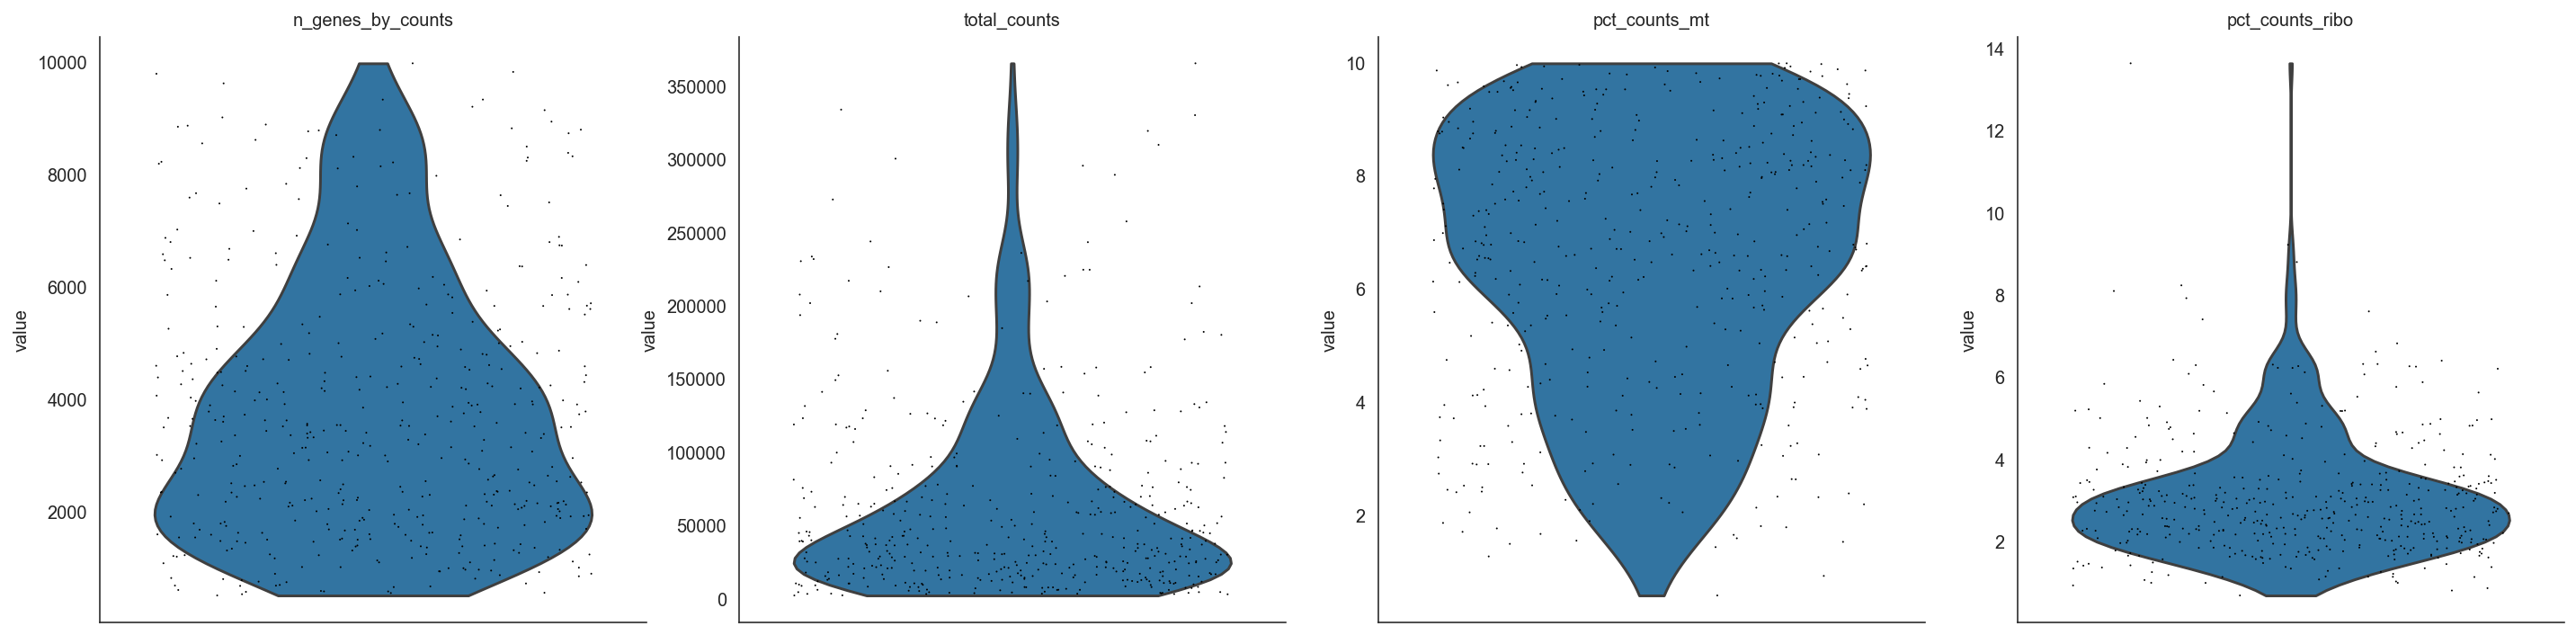

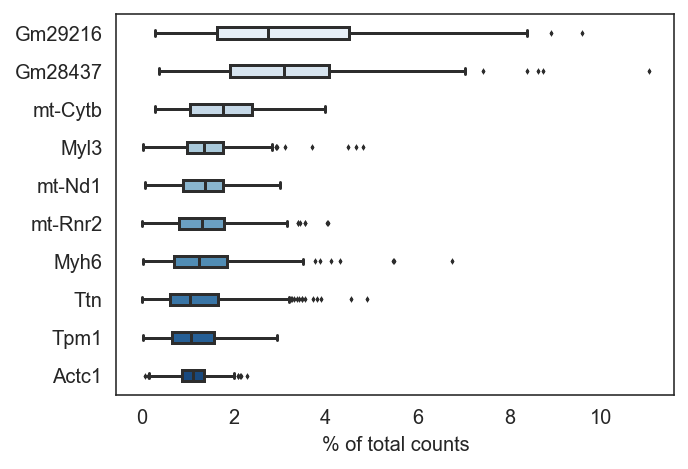

Number of genes after removing undetected ones:  1768
Number of genes after cleaning:  1639


In [33]:
trainNorm = autoAnalysis(training)

This function above removes cells with high mitochondrial and ribosomal genes expressed by setting thresholds on their pcr_counts. mitochondrial genes are generally relatively more persistent in dying or damaged cells, which we want to remove for analyses. Thus, cells with pct_counts of mito genes would be removed from the adata set. ribosomal genes are highly abundant, which makes the barcodes where ribo genes make up a high amount of UMIs likely to yield low sensitivity for other transcripts. Thus, to ensure good sensitivity for the general data, barcodes with high level expression of ribo genes are thought to be low-quality and should be removed. Genes that are only detected sporadically and unlikely to contribute much are also removed to help reduce noise in the data. Additionally, this function also normalizes the barcode/cell expression to account for non-biological differences in library size so that they end up with the same total expression. gene expression values are also transformed using z-score so that all selected genes contribute roughly equally to PCA.

The gThresh for removing undetected genes is set to be 250 to ensure only around 2000 genes remain for future analysis, since cell oracle can only handle 1000-3000 genes optimally. 

In [34]:
sc.pp.highly_variable_genes(trainNorm, min_mean=0.0125, max_mean=5, min_disp=0.25)

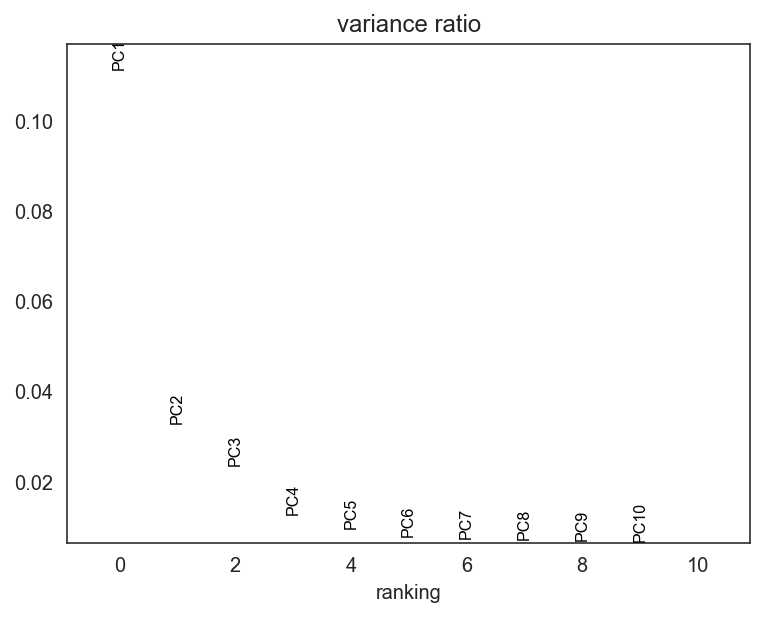

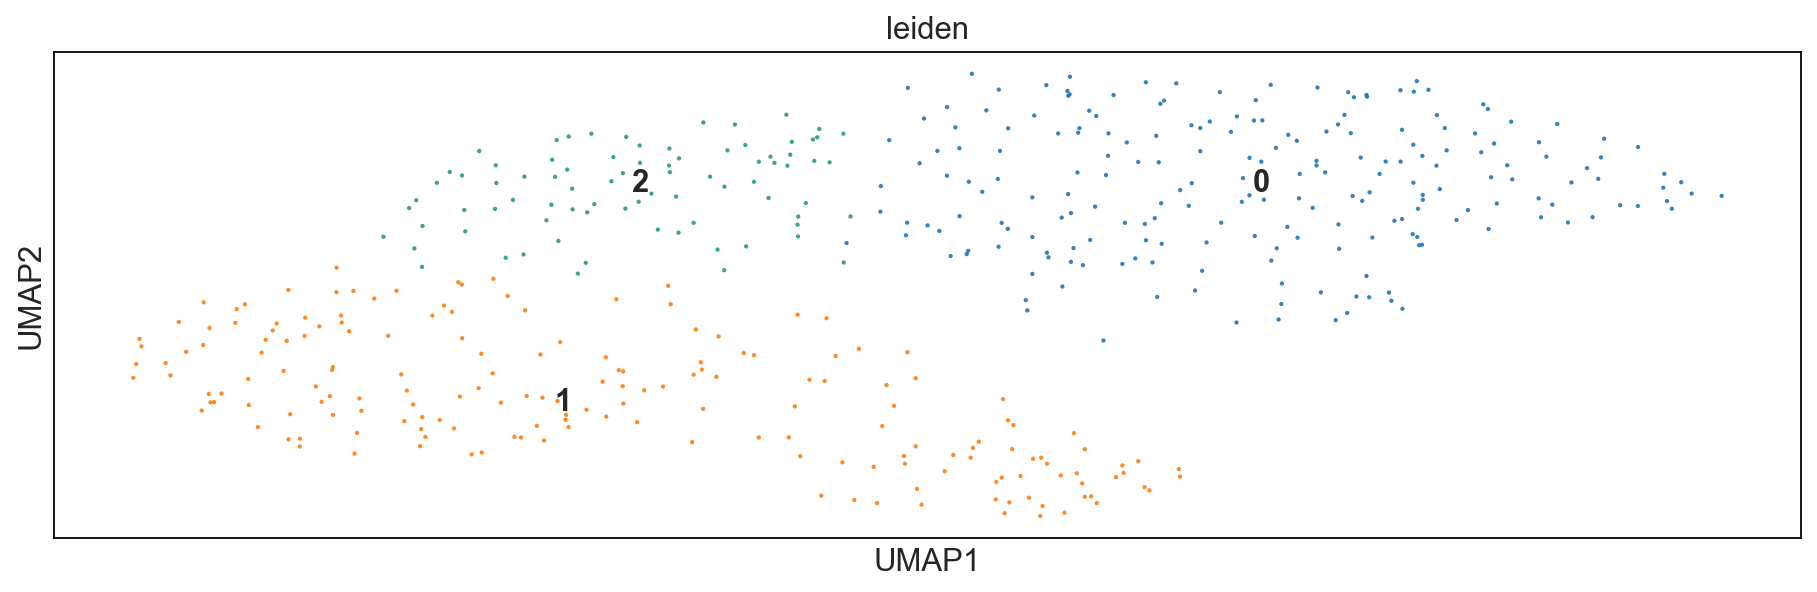

In [35]:
## The following cells perform PCA analysis and leiden clustering on the young dataset 
## to reduce the dimension of the data for easy analysis and better classification. 

trainNorm.raw = trainNorm
sc.pp.scale(trainNorm, max_value=10)
sc.tl.pca(trainNorm, n_comps=10, use_highly_variable=True)

sc.pl.pca_variance_ratio(trainNorm, 10, )

# finding PCAs and visualizing them
sc.set_figure_params(figsize="14, 4")

npcs = 10
sc.pp.neighbors(trainNorm, n_neighbors=35, n_pcs=npcs)
sc.tl.leiden(trainNorm,.25)
sc.tl.umap(trainNorm, .5)
sc.pl.umap(trainNorm, color=["leiden"], alpha=.9, s=15, legend_loc='on data', size=50,)

In [36]:
trainNorm

AnnData object with n_obs × n_vars = 471 × 1639
    obs: 'i7', 'cellbarcode', 'column', 'timepoint', 'genes', 'umis', 'ERCC_percent', 'reads', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [37]:
oracle = co.Oracle()
trainNorm.X = trainNorm.raw.X
oracle.import_anndata_as_raw_count(adata=trainNorm,
                                    cluster_column_name="leiden", #good
                                   embedding_name="X_pca")
oracle.import_TF_data(TF_info_matrix=base_GRN)
oracle.addTFinfo_dictionary({"Foxn1":['Ccl25', 'Psmb11', 'Pdlim1', 'Mfsd12', 'Mreg', 'Fam57a', 'Ppp1r16b']})

Total number of TF was 35. Although we can go to the GRN calculation with this data, but the TF number is small.
Total number of TF was 36. Although we can go to the GRN calculation with this data, but the TF number is small.


In [39]:
adata.obs["fake_cluster"]="all_one_cluster"
adata.obs.fake_cluster = adata.obs.fake_cluster.astype("category")
adata.uns["fake_cluster_colors"] = ['leiden']

In [40]:
oracle.perform_PCA()
n_comps = 50
n_cell = oracle.adata.shape[0]
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)


Auto-selected k is :11


In [41]:
warnings.filterwarnings('ignore') #Otherwise, np.int nightmare
links = oracle.get_links(cluster_name_for_GRN_unit="leiden", alpha=10,
                         verbose_level=10, test_mode=False, n_jobs=-1)

  0%|          | 0/3 [00:00<?, ?it/s]

inferring GRN for 0...


  0%|          | 0/1270 [00:00<?, ?it/s]

inferring GRN for 1...


  0%|          | 0/1270 [00:00<?, ?it/s]

inferring GRN for 2...


  0%|          | 0/1270 [00:00<?, ?it/s]

In [42]:
links.links_dict["0"].head()


,source,target,coef_mean,coef_abs,p,-logp
0,Chd2,0610012G03Rik,0.157957,0.157957,2.884312e-14,13.539958
1,Jun,0610012G03Rik,0.052624,0.052624,1.590749e-08,7.798398
2,Tcf7l2,0610012G03Rik,0.058779,0.058779,3.483208e-07,6.458021
3,Srf,0610012G03Rik,0.085684,0.085684,1.367509e-11,10.864070
4,Mef2a,1700020I14Rik,0.022765,0.022765,1.068025e-03,2.971419


In [43]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

fitting GRN again...
calculating GRN in 0


  0%|          | 0/1639 [00:00<?, ?it/s]

genes_in_gem: 1639
models made for 861 genes
calculating GRN in 1


  0%|          | 0/1639 [00:00<?, ?it/s]

genes_in_gem: 1639
models made for 883 genes
calculating GRN in 2


  0%|          | 0/1639 [00:00<?, ?it/s]

genes_in_gem: 1639
models made for 784 genes


# In silico TF perturbation analysis

In [49]:
trainNorm

AnnData object with n_obs × n_vars = 471 × 1639
    obs: 'i7', 'cellbarcode', 'column', 'timepoint', 'genes', 'umis', 'ERCC_percent', 'reads', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

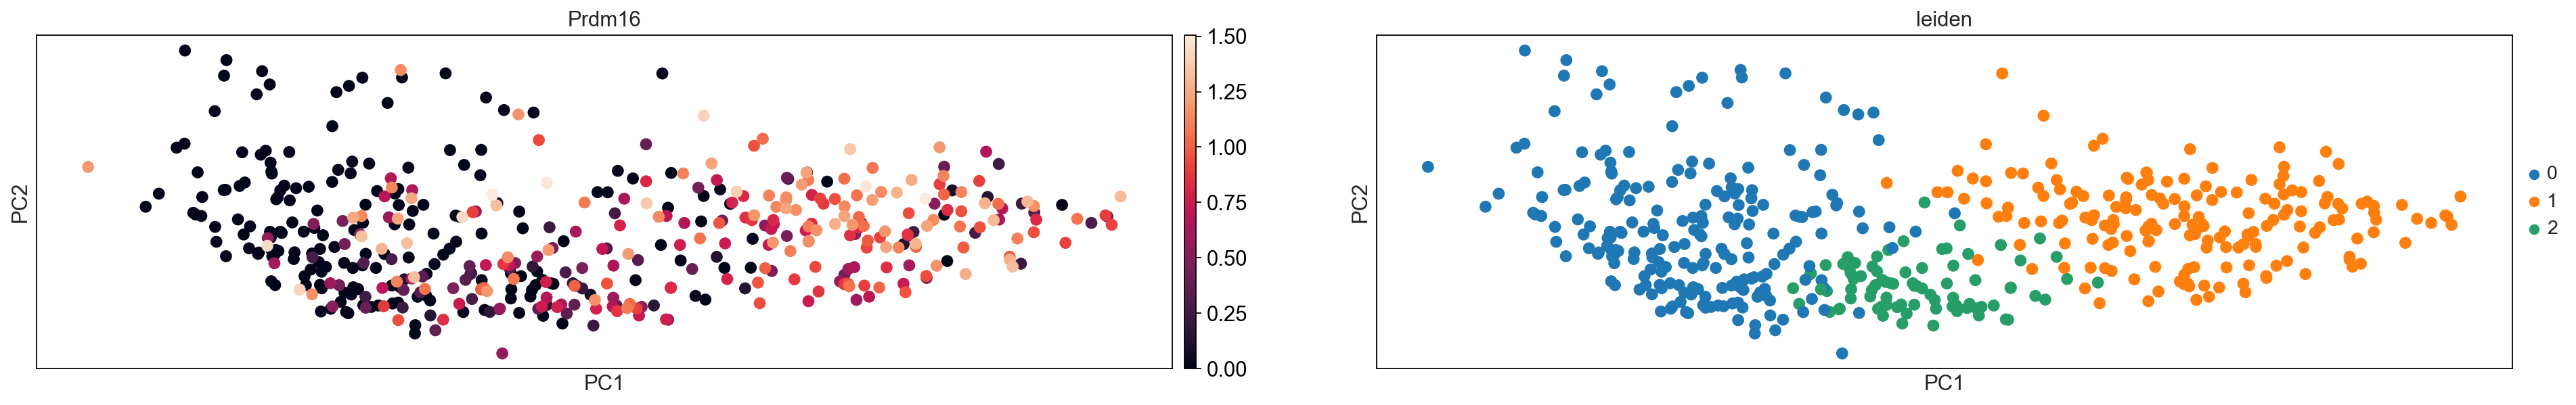

In [54]:
# check gene expression 
goi = "Prdm16"
sc.pl.pca_scatter(oracle.adata, color=[goi, oracle.cluster_column_name], use_raw=False)


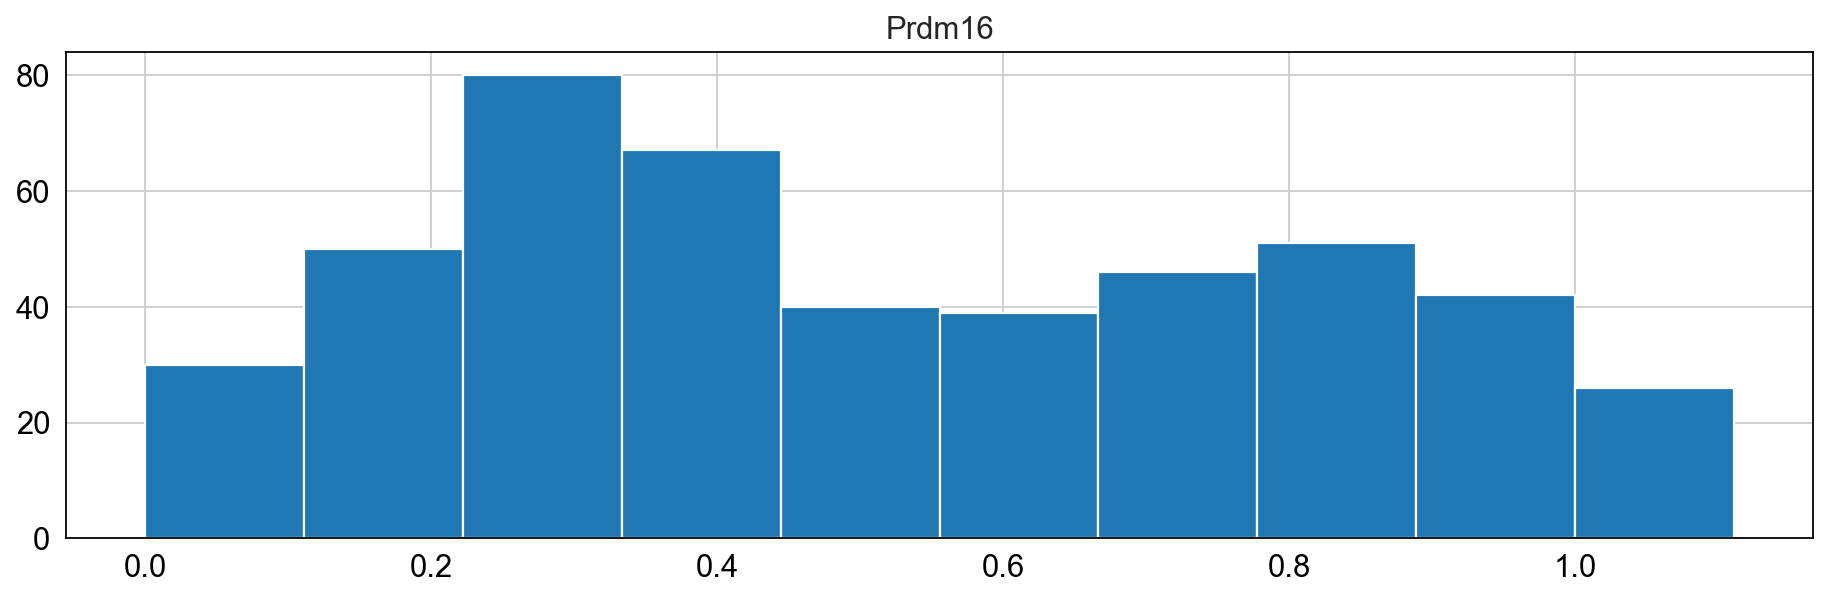

In [55]:
# Plot gene expression in histogram
sc.get.obs_df(oracle.adata, keys=[goi], layer="imputed_count").hist()
plt.show()

In [56]:
# simulate Prdm16 KO by setting its expression to 0
oracle.simulate_shift(perturb_condition={"Prdm16": 0.0}, n_propagation=3)
# Fold change is stored here.
oracle.adata.layers['delta_X']

array([[ 0.        ,  0.        , -0.01224823, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.01497265, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.01727107, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.00977234, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00990041, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.01381818, ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
# Get transition probability
oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True,
                                sampled_fraction=1)

# Calculate embedding
oracle.calculate_embedding_shift(sigma_corr=0.05)

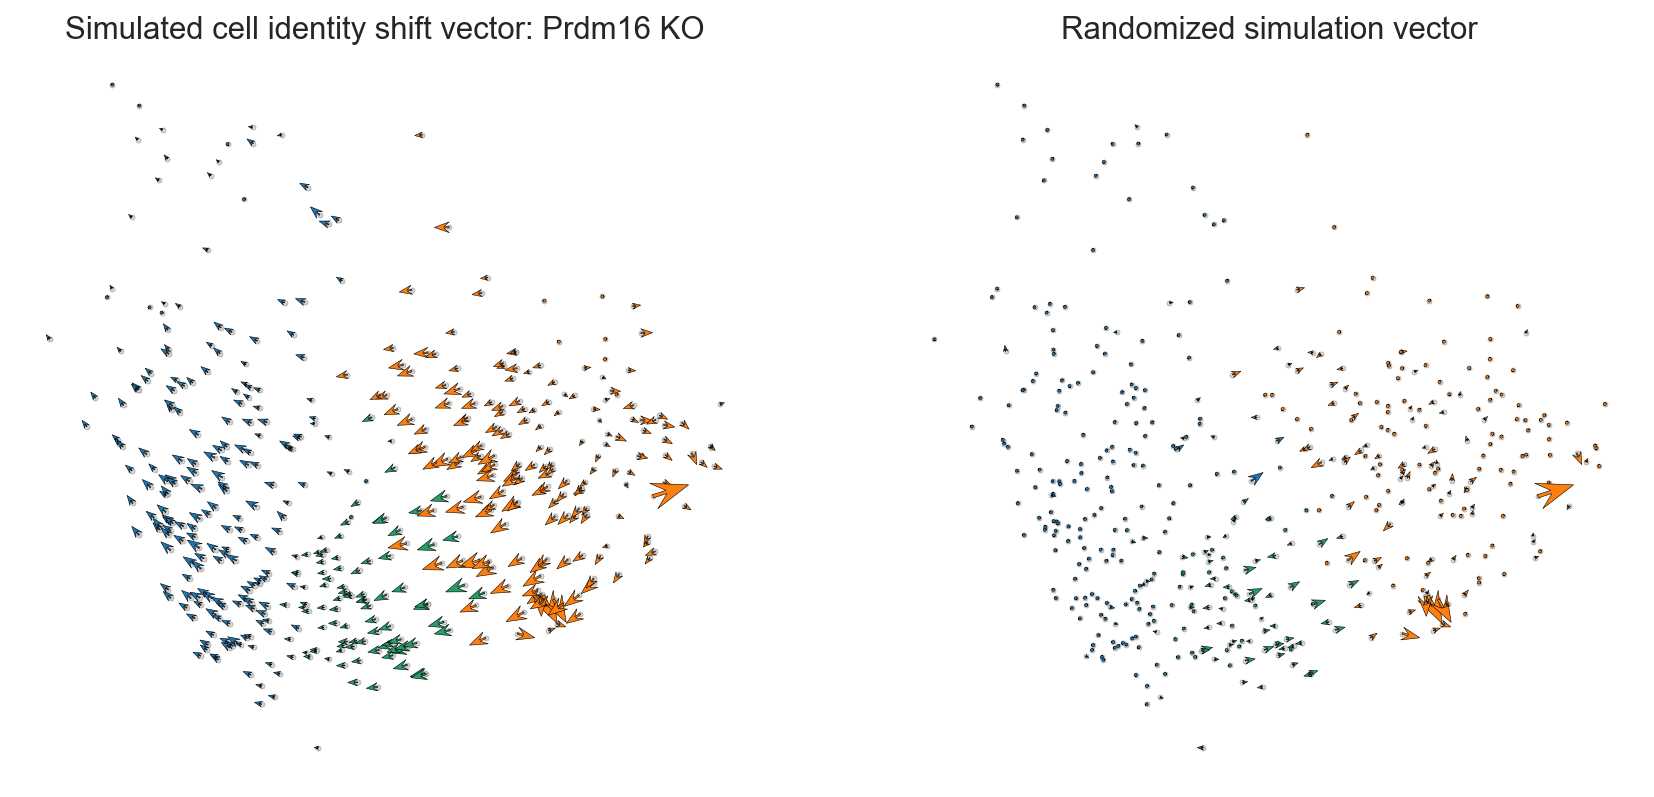

In [66]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale = 20
# Show quiver plot
oracle.plot_quiver(scale=scale, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_quiver_random(scale=scale, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

In [75]:
trainNorm

AnnData object with n_obs × n_vars = 471 × 1639
    obs: 'i7', 'cellbarcode', 'column', 'timepoint', 'genes', 'umis', 'ERCC_percent', 'reads', 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [77]:
prdmko

AnnData object with n_obs × n_vars = 5000 × 32285
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [74]:
oracle.calculate_p_mass(smooth=0.8, n_grid=40, n_neighbors=200)
oracle.calculate_mass_filter(min_mass=0.01, plot=False)
oracle.plot_cluster_whole(s=10)
oracle.plot_simulation_flow_on_grid(scale=0.5, show_background=False)
plt.show()
sc.pl.draw_graph(oracle.adata, color=["Prdm16", oracle.cluster_column_name],
                 layer="imputed_count", use_raw=False, cmap="viridis")

IndexError: tuple index out of range

In [ ]:
oracle.suggest_mass_thresholds()

## Major Questions (Graduate Section Only): 

### Option 1: 

<b>What non-genetic cues might improve you engineered cardiomyocytes?</b>

Aside from overexpressing transcription factors, another method of optimizing cell fate engineering is to use drug compounds or morphogens that target signaling pathways with important roles in embryonic development. (Box 1 gives some context on morphogens.) Modify or repurpose CellOracle to allow predictions of transcriptomic changes due to activation or repression of signaling pathways. Ideally, any new method of this sort would be tested on a prediction task relevant to in vitro directed differentiation. One potential test dataset is [this screen of 320 FDA-approved drugs for maturation of mouse colon organoids](https://www.sciencedirect.com/science/article/pii/S2211124721003405), available in the [compound_screening folder](https://compstemcellbio.s3.amazonaws.com/2022/final_project/compound_screen.zip). In each sample, the full transcriptome is not measured, but roughly 200 genes are measured, which provides enough information to test detailed predictions from an extension of CellOracle. If your solution would benefit from a full-transcriptome intestinal organoid dataset, we suggest the mouse intestinal organoid scRNA-seq dataset from [Grün et al. 2015](https://www.nature.com/articles/nature14966), which uses the same protocol to culture organoids. This dataset is available in the [grun_organoids folder](https://compstemcellbio.s3.amazonaws.com/2022/final_project/grun_organoids.zip).


***

<b>Box 1: Morphogens.</b> Morphogens are diffusible signals that play a role in patterning of tissues and organs during development. One example of a morphogen is Sonic HedgeHog (SHH). It is a soluble protein. It is important in dorsoventral patterning of vertebrate embryos. During formation of the spinal cord, a flat layer of ectoderm folds inward to form a tube. SHH is secreted from a plate of cells on the innermost side of the tube. It diffuses towards the outermost side. As it reaches the cells that will respond to it, it interacts with membrane-bound protein complexes. Through a moderately complicated series of events, it eventually activates transcription factors from the Gli family. Depending on the dose, different target genes are activated. These target genes repress each others’ expression, giving rise to sharp boundaries between discrete zones with distinct transcriptional profiles. These boundaries remain stable when SHH is removed; the cells are committed to their respective fates. Morphogens provide similar spatial cues throughout development of diverse body structures in diverse organisms. 

<b>Morphogen diversity.</b> Morphogens can be soluble proteins like SHH. They can also be small molecules. An example of a natural small-molecule morphogen is retinoic acid, and an example of a natural small-molecule inhibitor of SHH is cyclopamine. (Cyclopamine occurs in plants as a poison, helping defend against herbivorous animals.) Morphogens are often discussed in terms of “pathways”, which describe how the signal reaches the nucleus starting from outside the cell. Other examples of morphogen pathways are Notch, Wnt, bone morphogenic protein (BMP), and transforming growth factor beta (TGF-beta). Each of these has distinct roles, mechanisms, and quirks. There is a surprisingly small collection of pathways that are re-used in many contexts during development of animals with bilateral symmetry. These receive special attention in stem cell biology. But, it is also possible to screen drugs or compounds with no known role in development; they may still prove useful in directed differentiation protocols.

<figure>
    <img src="img/morphogen_image1.png" width=300>
    <figcaption>Difference classes of spinal neurons are patterned by different doses of SHH over a fairly short (<24hr) time interval. Image credit: https://cshperspectives.cshlp.org/content/1/2/a002014/F2.expansion.html
                                                                                                                         
</figcaption>
</figure>

<figure>
    <img src="img/morphogen_image2.png" width=300>
    <figcaption>How the SHH signal is transduced into the nucleus to alter transcription. 

Image credit: https://www.frontiersin.org/articles/10.3389/fmolb.2021.711710/full

</figcaption>
</figure>

***

### Option 2: 

<b>How can your computational methods be translated to help engineer human cardiomyocytes? </b>

Questions 1-3 focus on mouse cells, but your collaborators are ultimately interested in translational and medical research, so they need human CM’s. They have generated preliminary data on directed differentiation of human cells, available in [human_engineered_cardiomyocytes](https://compstemcellbio.s3.amazonaws.com/2022/final_project/human_engineered_cardiomyocytes.zip) (in fact, these data are from [Giacomelli et al.](https://www.cell.com/cell-stem-cell/fulltext/S1934-5909(20)30202-2)). Apply the same assessment and TF screening methods to human iPSCs.